In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

In [3]:
def read_ratefile(infile):
    x,y,z,r = [],[],[],[]
    with open(infile, 'r') as f:
        csvreader = csv.reader(f)
        header = next(csvreader)
        for row in csvreader:
            x.append(float(row[0]))
            y.append(float(row[1]))
            z.append(float(row[2]))  
            r.append(float(row[3]))
    return x,y,z,r 

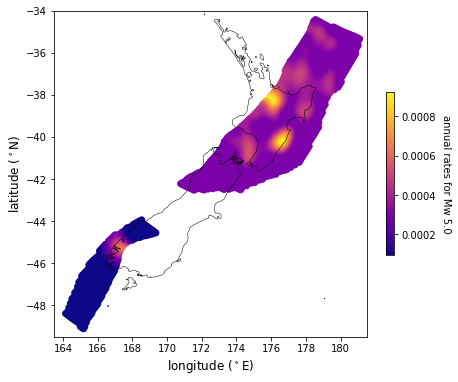

In [4]:
import nzborders as nzb

outfolder = 'files/processed-smooth/'
files = ['hik-slab-smooth_1depth.csv','puy-slab-smooth_1depth.csv']

hx,hy,hz,r1 = read_ratefile(outfolder+files[0])
hr = []
for r in r1:
    hr.append(r*1.3638)
px,py,pz,r2 = read_ratefile(outfolder+files[1])
pr = []
for r in r2:
    pr.append(r*0.14769)
    
x = hx+px
y = hy+py
r = hr+pr

fig, ax = plt.subplots(figsize=(7,6))
sc = ax.scatter(x,y, c=r, cmap='plasma')
cbar = fig.colorbar(sc, ax = ax, shrink=0.5);

cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('annual rates for Mw 5.0', rotation=270)
nzb.plot(file='nzborders.json', plinewidth= 0.5, pcolor = 'k', ax=ax)
ax.set_xlim([163.5,181.5])
ax.set_ylim([-49.5,-34])

plt.show()



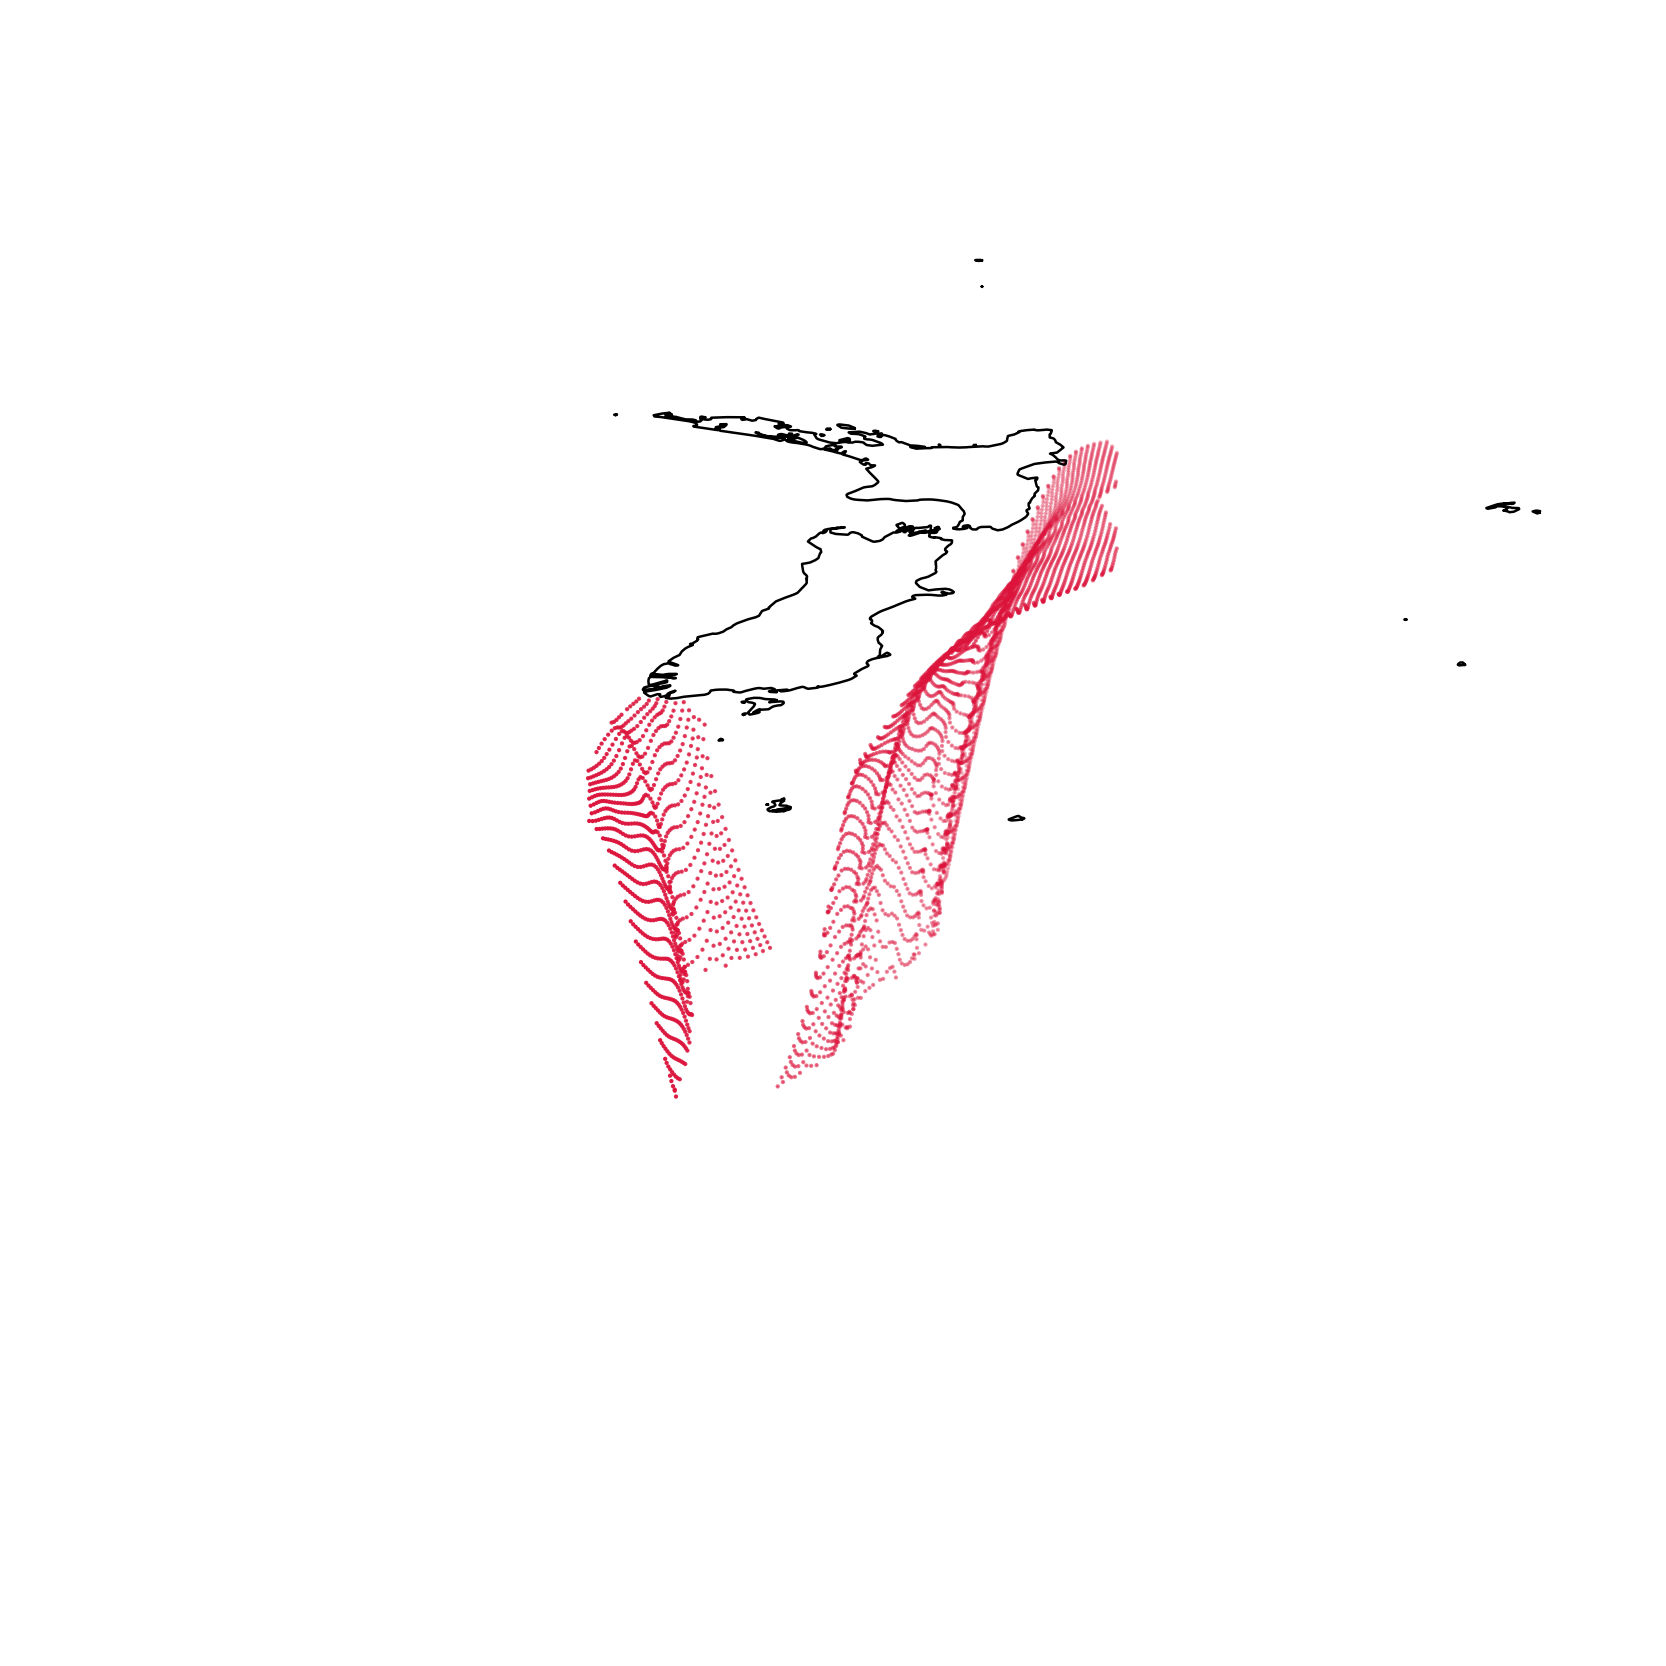

In [37]:
from mpl_toolkits.mplot3d import Axes3D 
outfolder = 'files/processed-smooth/'
files = ['hik-slab-smooth_1depth.csv','puy-slab-smooth_1depth.csv']

hx,hy,hz,r1 = read_ratefile(outfolder+files[0])
px,py,pz,r2 = read_ratefile(outfolder+files[1])
x = hx+px
y = hy+py
z = hz+pz

fig = plt.figure(figsize=(12, 12), dpi=180)
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c='crimson', s=0.5)

f = open("nzborders.json")
border = json.load(f)
f.close()
ax.plot3D(border['lon'], border['lat'], [0]*len(border['lon']),'-',\
             linewidth= 1, color='k', zorder=4);

ax.set_xlabel('longitude ($^\circ$E)')
ax.set_ylabel('latitude ($^\circ$N)')
ax.set_zlabel('depth (km)')
ax.set_box_aspect((1, 1, 0.5))
ax.set_xlim([163.5,181.5])
ax.set_ylim([-49.5,-34])
ax.set_zlim(0, 250)
ax.invert_zaxis()
ax.view_init(elev=20., azim=-116)
ax.set_axis_off()
plt.show()

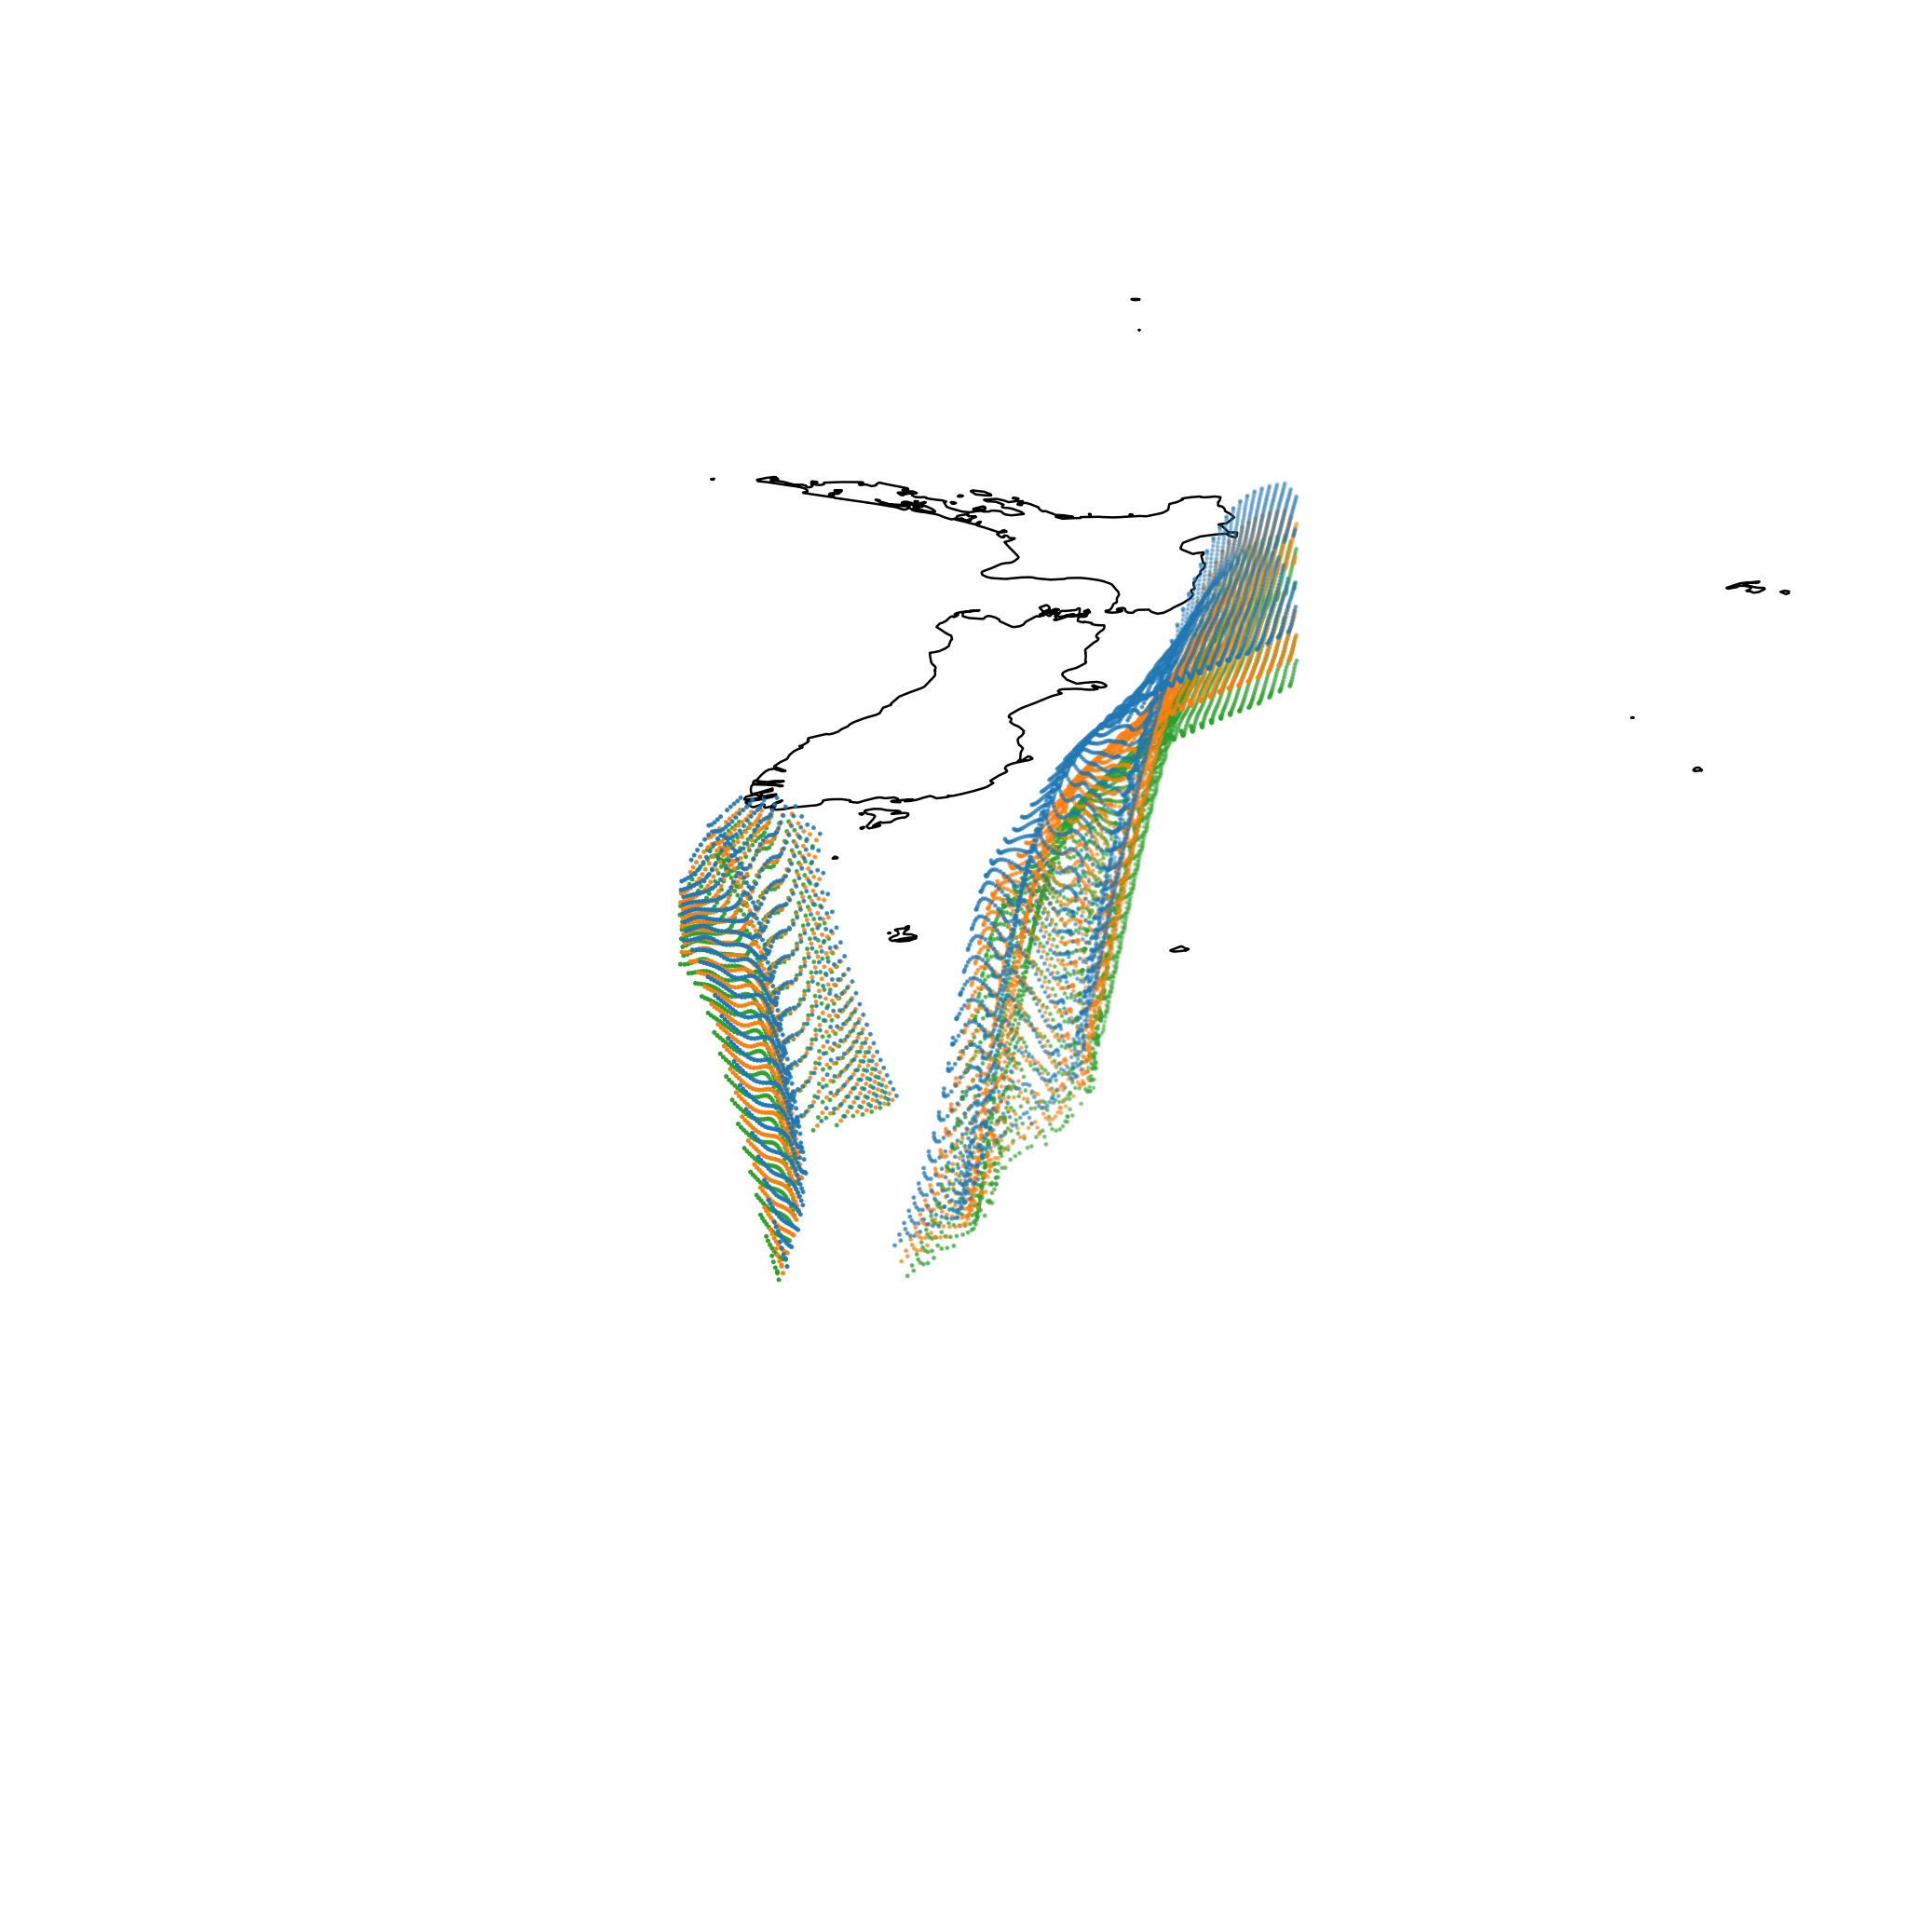

In [36]:
#from mpl_toolkits.mplot3d import Axes3D 
import json
plt.rcParams.update({'font.size': 12})


%matplotlib inline

outfolder = 'files/processed-smooth/'

files = ['hik-slab-smooth_lay1.csv', 'puy-slab-smooth_lay1.csv',
          'hik-slab-smooth_lay2.csv', 'puy-slab-smooth_lay2.csv',
          'hik-slab-smooth_lay3.csv','puy-slab-smooth_lay3.csv',]

#fig = plt.figure(figsize=(6, 6))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,15), dpi=180)
#ax = fig.add_subplot(projection='3d')
indxx = [0,2,4]
for i in indxx:
    hx,hy,hz,r1 = read_ratefile(outfolder+files[i])
    px,py,pz,r2 = read_ratefile(outfolder+files[i+1])
    x = hx+px
    y = hy+py
    z = hz+pz
   
    ax.scatter(x, y, z,s=1)
f = open("nzborders.json")
border = json.load(f)
f.close()
ax.plot3D(border['lon'], border['lat'], [0]*len(border['lon']),'-',\
             linewidth= 1, color='k', zorder=4);
    
ax.set_xlabel('longitude ($^\circ$E)')
ax.set_ylabel('latitude ($^\circ$N)')
ax.set_zlabel('depth ($^\circ$)')
ax.set_box_aspect((1, 1, 0.5))
ax.set_xlim([163.5,181.5])
ax.set_ylim([-49.5,-34])
ax.set_zlim(0, 250)
ax.invert_zaxis()
ax.view_init(elev=20., azim=-116)
ax.set_axis_off()
#ax.grid(False)
#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

plt.show()
